## Task 3  Pizza Place Sales

In [202]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [203]:
# Load datasets (handle encoding issues)
order_details = pd.read_csv(r"C:\Users\timi\Downloads\pizza_sales\order_details.csv", encoding='latin1')
orders = pd.read_csv(r"C:\Users\timi\Downloads\pizza_sales\orders.csv", encoding='latin1')
pizzas = pd.read_csv(r"C:\Users\timi\Downloads\pizza_sales\pizzas.csv", encoding='latin1')
pizza_types = pd.read_csv(r"C:\Users\timi\Downloads\pizza_sales\pizza_types.csv", encoding='latin1')

# Preview data
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [204]:
print("Orders:", orders.shape)
print("Order Details:", order_details.shape)
print("Pizzas:", pizzas.shape)
print("Pizza Types:", pizza_types.shape)


Orders: (21350, 3)
Order Details: (48620, 4)
Pizzas: (96, 4)
Pizza Types: (32, 4)


### Data Cleaning

In [205]:
# Check for missing values
print("Missing values in Orders:\n", orders.isnull().sum())
print("\nMissing values in Order Details:\n", order_details.isnull().sum())
print("\nMissing values in Pizzas:\n", pizzas.isnull().sum())
print("\nMissing values in Pizza Types:\n", pizza_types.isnull().sum())



Missing values in Orders:
 order_id    0
date        0
time        0
dtype: int64

Missing values in Order Details:
 order_details_id    0
order_id            0
pizza_id            0
quantity            0
dtype: int64

Missing values in Pizzas:
 pizza_id         0
pizza_type_id    0
size             0
price            0
dtype: int64

Missing values in Pizza Types:
 pizza_type_id    0
name             0
category         0
ingredients      0
dtype: int64


In [206]:
# Check for duplicates
print("Orders duplicates:", orders.duplicated().sum())
print("Order Details duplicates:", order_details.duplicated().sum())
print("Pizzas duplicates:", pizzas.duplicated().sum())
print("Pizza Types duplicates:", pizza_types.duplicated().sum())


Orders duplicates: 0
Order Details duplicates: 0
Pizzas duplicates: 0
Pizza Types duplicates: 0


In [207]:
# Convert date column to datetime
orders['date'] = pd.to_datetime(orders['date'])

# Extract useful date features
orders['day'] = orders['date'].dt.day_name()
orders['month'] = orders['date'].dt.month_name()
orders['hour'] = pd.to_datetime(
orders['time'], format='%H:%M:%S').dt.hour


### Cleaned the data by checking for missing values, removing duplicates, and converting date columns into proper datetime format to enable time-based analysis.

In [208]:
orders['date'] = pd.to_datetime(orders['date'])
order_details['quantity'] = order_details['quantity'].astype(int)
pizzas['price'] = pizzas['price'].astype(float)


In [209]:
orders.columns = orders.columns.str.lower().str.strip()
order_details.columns = order_details.columns.str.lower().str.strip()
pizzas.columns = pizzas.columns.str.lower().str.strip()
pizza_types.columns = pizza_types.columns.str.lower().str.strip()


In [210]:
# Merge all four tables
df = order_details.merge(orders, on='order_id') \
                  .merge(pizzas, on='pizza_id') \
                  .merge(pizza_types, on='pizza_type_id')

df.head()


,order_details_id,order_id,pizza_id,quantity,date,time,day,month,hour,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,Thursday,January,11,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,Thursday,January,11,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,Thursday,January,11,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,Thursday,January,11,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,5,2,mexicana_m,1,2015-01-01,11:57:40,Thursday,January,11,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [211]:
# Extract additional features
df['day_of_week'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month_name()



## Analysis


In [212]:
# Create revenue column
df['revenue'] = df['quantity'] * df['price']

df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,day,month,hour,pizza_type_id,size,price,name,category,ingredients,day_of_week,revenue
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,Thursday,January,11,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",Thursday,13.25
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,Thursday,January,11,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",Thursday,16.00
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,Thursday,January,11,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",Thursday,18.50
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,Thursday,January,11,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",Thursday,20.75
4,5,2,mexicana_m,1,2015-01-01,11:57:40,Thursday,January,11,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",Thursday,16.00


In [227]:
## What is the total revenue/sales?

total_revenue = df['revenue'].sum()
print(f"The total revenue is ${total_revenue:,.2f}")


The total revenue is $817,860.05


In [214]:
## Find the total quantity sold.

total_quantity = df['quantity'].sum()
print(f"The total quantity sold is {total_quantity:,} pizzas")


The total quantity sold is 49,574 pizzas


In [215]:
## Find the total orders.

total_orders = df['order_id'].nunique()
print(f"The total number of orders is {total_orders:,}")



The total number of orders is 21,350


In [216]:
## How many pizza types do they sell?

pizza_types_count = df['name'].nunique()
print(f"The total number of pizza types sold is {pizza_types_count}")


The total number of pizza types sold is 32


In [ ]:
## Find the average price of the pizzas.


In [217]:
##What are the peak hours of sales?
hourly_sales = df.groupby('hour')['revenue'].sum()

peak_hour = hourly_sales.idxmax()

print(f"The peak hour of sales is {peak_hour}:00")




The peak hour of sales is 12:00


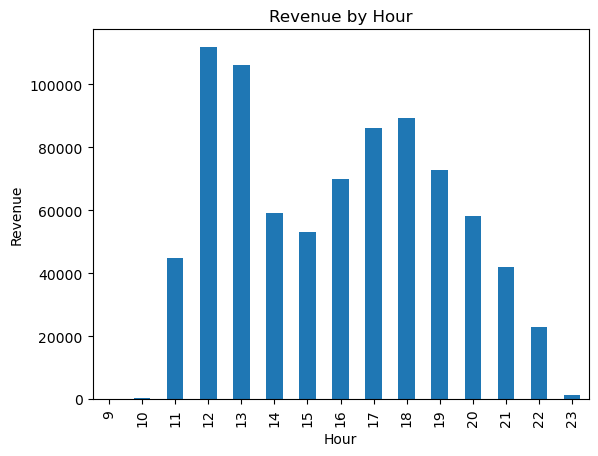

In [218]:
plt.figure()
hourly_sales.plot(kind='bar')
plt.title("Revenue by Hour")
plt.xlabel("Hour")
plt.ylabel("Revenue")
plt.show()


### The highest revenue is generated during lunch hours, especially around midday.

In [235]:
## Find the total sales made on each day of the week. 
sales_by_day = df.groupby('day_of_week')['revenue'].sum().sort_values(ascending=True)

day_order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday",
               "Saturday"]

sales_by_day = sales_by_day.reindex(day_order)
sales_table = sales_by_day.reset_index()
sales_table.columns = ['Day of Week', 'Total Sales']

print(f"The total sales for each day is in the table below")
display(sales_table)

## Which day of the week is when sales are made the most?
best_day = sales_by_day.idxmax()
print(f"The day with the highest sales is {best_day}.")


The total sales for each day is in the table below


,Day of Week,Total Sales
0,Sunday,99203.50
1,Monday,107329.55
2,Tuesday,114133.80
3,Wednesday,114408.40
4,Thursday,123528.50
5,Friday,136073.90
6,Saturday,123182.40


The day with the highest sales is Friday.


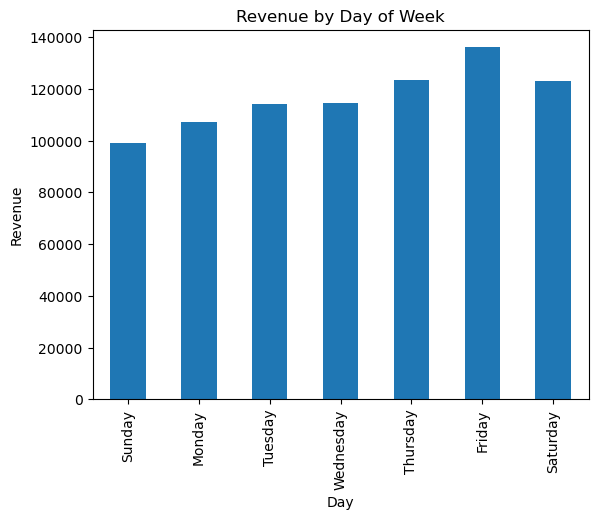

In [236]:
plt.figure()
sales_by_day.plot(kind='bar')
plt.title("Revenue by Day of Week")
plt.xlabel("Day")
plt.ylabel("Revenue")
plt.show()

### Sales are highest on Fridays, indicating strong pre-weekend demand.

In [221]:
## Find the top 5 bestselling pizzas.
top_5 = df.groupby('name')['quantity'].sum().sort_values(ascending=False).head(5)

top_5_table = top_5.reset_index()
top_5_table.columns = ['Name', 'Quantity']

print("The top 5 bestselling pizzas are:")
display(top_5_table)


The top 5 bestselling pizzas are:


,Name,Quantity
0,The Classic Deluxe Pizza,2453
1,The Barbecue Chicken Pizza,2432
2,The Hawaiian Pizza,2422
3,The Pepperoni Pizza,2418
4,The Thai Chicken Pizza,2371


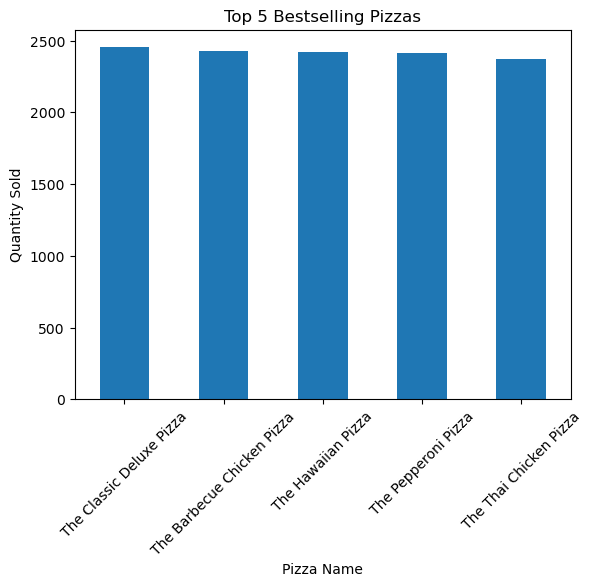

In [222]:
plt.figure()
top_5.plot(kind='bar')
plt.title("Top 5 Bestselling Pizzas")
plt.xlabel("Pizza Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()


In [223]:
## Find the sales made in each month
sales_by_month = df.groupby('month')['revenue'].sum().sort_values(ascending=True)

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

sales_by_month = sales_by_month.reindex(month_order)

month_order_table = sales_by_month.reset_index()
month_order_table.columns = ['Month', 'Sales']

print(f"The sales made in each month is listed below")
display(month_order_table)

best_month = sales_by_month.idxmax()
print(f"The month with the highest sales is {best_month}")


The sales made in each month is listed below


,Month,Revenue
0,January,69793.30
1,February,65159.60
2,March,70397.10
3,April,68736.80
4,May,71402.75
5,June,68230.20
6,July,72557.90
7,August,68278.25
8,September,64180.05
9,October,64027.60


The month with the highest sales is July


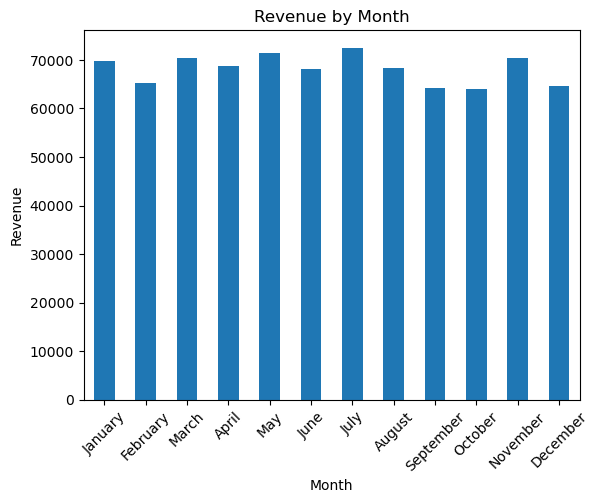

In [224]:
plt.figure()
sales_by_month.plot(kind='bar')
plt.title("Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()


### Any trend noticeable? - Sales show seasonal fluctuations, with noticeable peaks during mid-year months.

In [225]:
bottom_5 = df.groupby('name')['quantity'].sum().sort_values(ascending=True).head(5)


bottom_5_table = bottom_5.reset_index()
bottom_5_table.columns = ['Name', 'Quantity Sold']


print("The lowest performing pizzas are:")
display(bottom_5_table)

The lowest performing pizzas are:


,Name,Quantity Sold
0,The Brie Carre Pizza,490
1,The Mediterranean Pizza,934
2,The Calabrese Pizza,937
3,The Spinach Supreme Pizza,950
4,The Soppressata Pizza,961


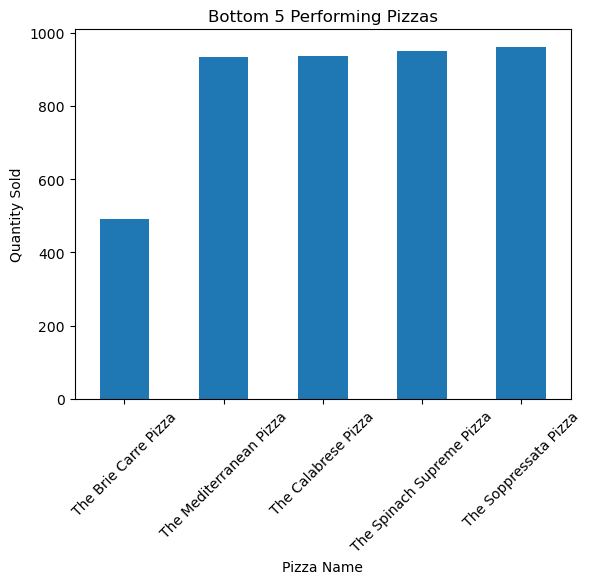

In [226]:
plt.figure()
bottom_5.plot(kind='bar')
plt.title("Bottom 5 Performing Pizzas")
plt.xlabel("Pizza Name")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.show()


### Some pizzas sell significantly less than others and may require marketing promotion or menu review.

### The pizza business performs strongest during lunch hours and Fridays.
### Certain pizza types dominate sales, while a few underperform and may need strategic attention.
### Overall revenue remains stable throughout the year with slight seasonal variation.